Load Packages

In [2]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

Load Dataset and split

In [3]:
# Load the dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Labels

# Convert categorical labels to binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Encode 'ALL' as 0 and 'AML' as 1

SVM Before Feature Selection 

In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Build the model
svm = SVC(kernel='linear', random_state=12, probability=True)  # Set probability=True for ROC-AUC

# Train the model
svm.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

from sklearn import metrics

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(Y_test, Y_pred)


# Output the results

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print(f"\nROC-AUC: {roc_auc:.4f}")

# Perform n-fold cross-validation
n = 2
cv_scores = cross_val_score(svm, X, Y, cv=n)

# Print cross-validation scores
print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC: 0.9583

Cross-validation Scores: [0.91666667 0.88888889]
Mean Cross-validation Accuracy: 0.9027777777777777


RF Before Feature Selection

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Build the Random Forest model
rf = RandomForestClassifier(n_estimators=3, random_state=13)

# Train the model
rf.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

from sklearn import metrics

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(Y_test, Y_pred)


# Output the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print(f"\nROC-AUC: {roc_auc:.4f}")

# Perform n-fold cross-validation
n = 5
cv_scores = cross_val_score(rf, X, Y, cv=n)

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())


Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.50      0.67         4

    accuracy                           0.87        15
   macro avg       0.92      0.75      0.79        15
weighted avg       0.89      0.87      0.85        15

Confusion Matrix:
[[11  0]
 [ 2  2]]

ROC-AUC: 0.7500
Cross-validation Scores: [0.86666667 0.66666667 0.57142857 0.78571429 0.78571429]
Mean Cross-validation Accuracy: 0.7352380952380951


Filter Feature Selection techniques for SVM (K features)


Evaluating with Mutual Information Selected Features:
Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC Score: 1.0000


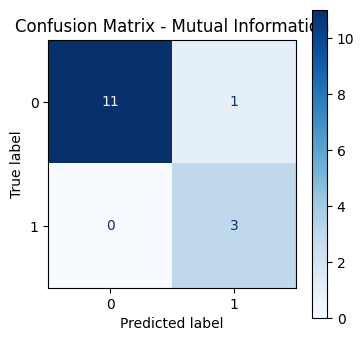


Cross-validation Scores: [0.96551724 0.96428571]
Mean Cross-validation Accuracy: 0.9649


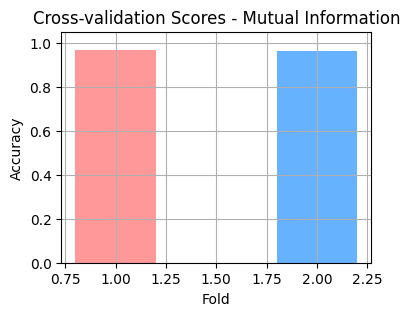

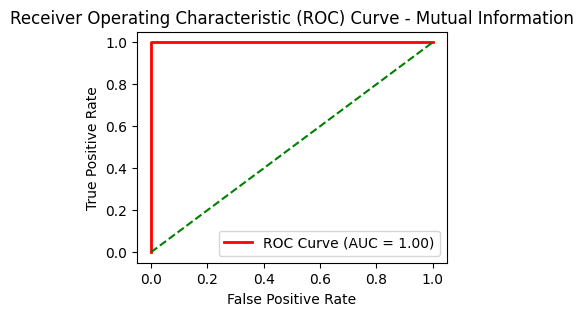

[0. 0. 0. 1.] [0.         0.33333333 1.         1.        ]

Evaluating with F-Score Selected Features:
Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC Score: 1.0000


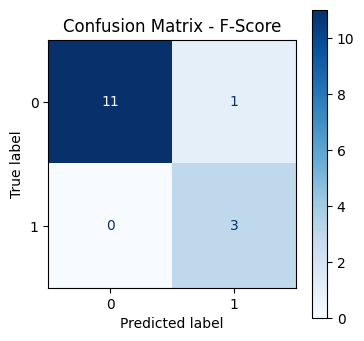


Cross-validation Scores: [0.96551724 0.96428571]
Mean Cross-validation Accuracy: 0.9649


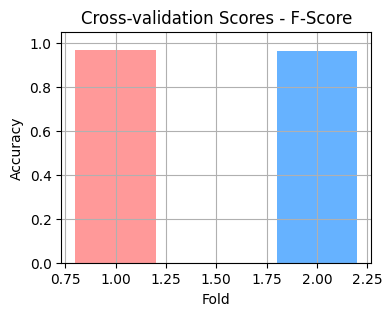

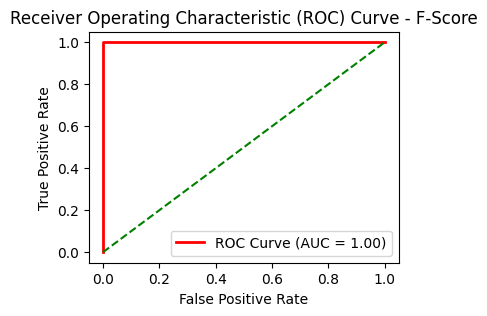

[0. 0. 0. 1.] [0.         0.33333333 1.         1.        ]

Evaluating with Chi-Square Selected Features:
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[12  0]
 [ 0  3]]

ROC-AUC Score: 1.0000


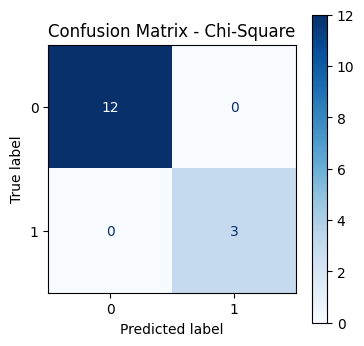


Cross-validation Scores: [0.96551724 0.96428571]
Mean Cross-validation Accuracy: 0.9649


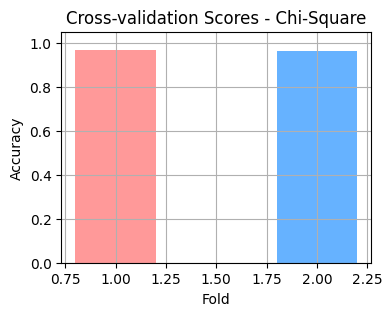

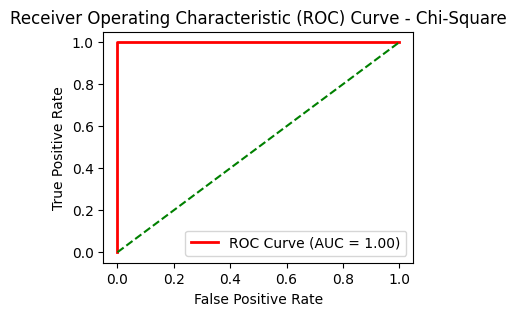

[0. 0. 0. 1.] [0.         0.33333333 1.         1.        ]


In [6]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Labels

# Convert categorical labels to binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Encode 'ALL' as 0 and 'AML' as 1

# Apply Min-Max Scaling to ensure non-negative values for Chi-Square
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=14)

# Number of top features to select
k = 250

# Feature Selection Techniques
# Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_mi = mi_selector.fit_transform(X_train, Y_train)
X_test_mi = mi_selector.transform(X_test)

# F-Score (ANOVA)
f_selector = SelectKBest(score_func=f_classif, k=k)
X_train_f = f_selector.fit_transform(X_train, Y_train)
X_test_f = f_selector.transform(X_test)

# Chi-Square (with scaled data)
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, Y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Function to train and evaluate the model, and plot the results
def evaluate_svm(X_train, X_test, Y_train, Y_test, feature_name):
    svm = SVC(kernel='linear', random_state=12, probability=True)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, svm.predict_proba(X_test)[:, 1])

    print(f"\nEvaluating with {feature_name} Selected Features:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Plot the confusion matrix
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    fig, ax = plt.subplots(figsize=(4, 4))  # Confusion matrix plot size
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix - {feature_name}')
    plt.show()

    # Perform n-fold cross-validation
    n = 2
    cv_scores = cross_val_score(svm, X_train, Y_train, cv=n)
    print(f"\nCross-validation Scores: {cv_scores}")
    print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")

    # Plot Cross-validation Scores as a bar plot
    plt.figure(figsize=(4, 3))  # Cross-validation plot size
    bar_width = 0.4  # Thinner bar width for a cleaner look
    colors = ['#FF9999', '#66B2FF']  # Custom color palette
    plt.bar(range(1, n + 1), cv_scores, color=colors[:n], width=bar_width)
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'Cross-validation Scores - {feature_name}')
    plt.ylim(0, 1.05)  # Limit y-axis to ensure all bars are visible
    plt.grid(True)
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(4, 3))  # ROC-AUC plot size
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, svm.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {feature_name}')
    plt.legend(loc="lower right")
    plt.show()
    print(fpr, tpr)

# Evaluate the model using Mutual Information selected features
evaluate_svm(X_train_mi, X_test_mi, Y_train, Y_test, 'Mutual Information')

# Evaluate the model using F-Score selected features
evaluate_svm(X_train_f, X_test_f, Y_train, Y_test, 'F-Score')

# Evaluate the model using Chi-Square selected features
evaluate_svm(X_train_chi2, X_test_chi2, Y_train, Y_test, 'Chi-Square')


Filter Feature Selection Techniques for RF (K features)


Evaluating with Mutual Information Selected Features:
Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC Score: 1.0000


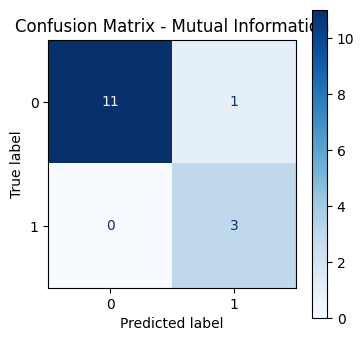


Cross-validation Scores: [1.         1.         0.90909091 1.         0.90909091]
Mean Cross-validation Accuracy: 0.9636


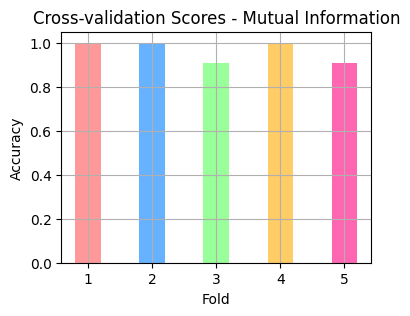

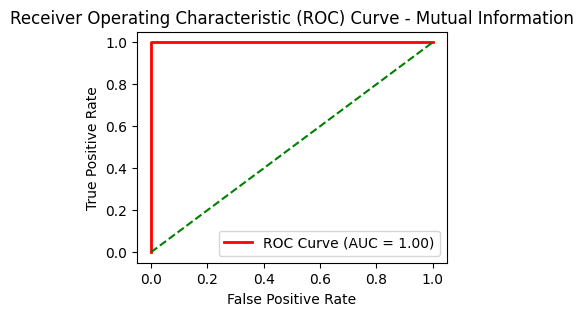

[0.         0.         0.         0.5        0.66666667 0.83333333
 1.        ] [0.         0.33333333 1.         1.         1.         1.
 1.        ]

Evaluating with F-Score Selected Features:
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[12  0]
 [ 0  3]]

ROC-AUC Score: 1.0000


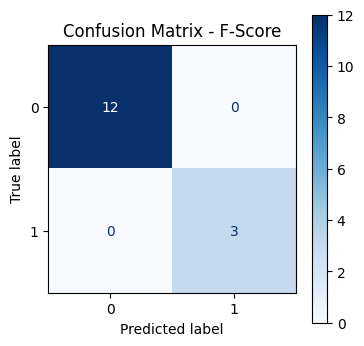


Cross-validation Scores: [1.         1.         0.90909091 1.         0.90909091]
Mean Cross-validation Accuracy: 0.9636


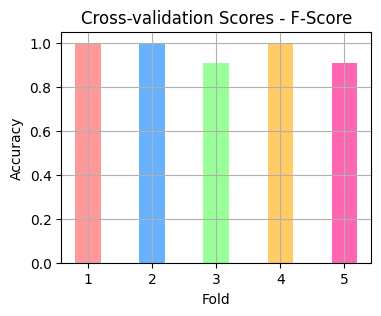

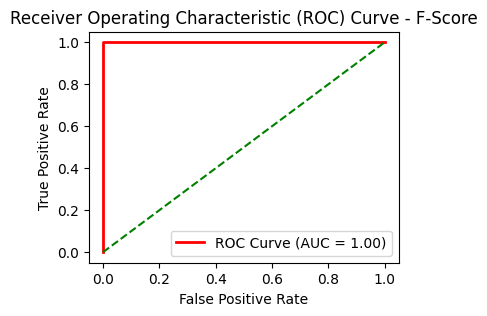

[0.         0.         0.         0.58333333 0.75       1.        ] [0.         0.33333333 1.         1.         1.         1.        ]

Evaluating with Chi-Square Selected Features:
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[12  0]
 [ 0  3]]

ROC-AUC Score: 1.0000


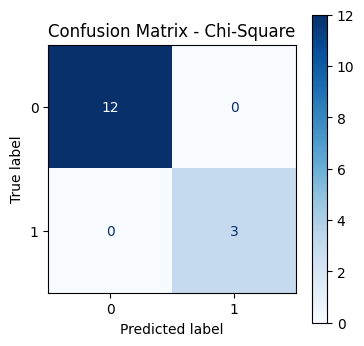


Cross-validation Scores: [1.         1.         0.90909091 1.         0.90909091]
Mean Cross-validation Accuracy: 0.9636


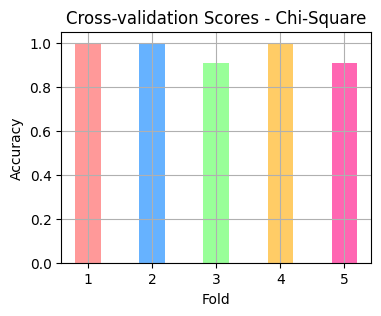

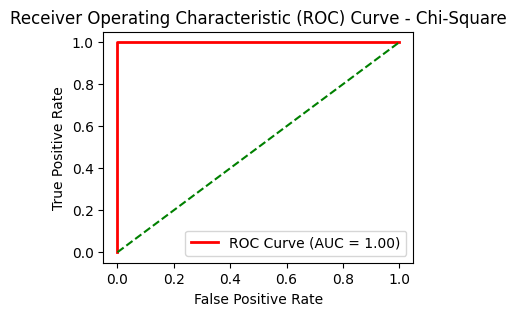

[0.         0.         0.         0.83333333 1.        ] [0.         0.33333333 1.         1.         1.        ]


In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn import metrics
import matplotlib.pyplot as plt

# Set the seed for reproducibility across NumPy random operations
np.random.seed(1111)

# Load the dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Labels

# Convert categorical labels to binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Encode 'ALL' as 0 and 'AML' as 1

# Apply Min-Max Scaling to ensure non-negative values for Chi-Square
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=14)

# Number of top features to select
k = 250

# Feature Selection Techniques
# Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_mi = mi_selector.fit_transform(X_train, Y_train)
X_test_mi = mi_selector.transform(X_test)

# F-Score (ANOVA)
f_selector = SelectKBest(score_func=f_classif, k=k)
X_train_f = f_selector.fit_transform(X_train, Y_train)
X_test_f = f_selector.transform(X_test)

# Chi-Square (with scaled data)
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, Y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Function to train, evaluate the Random Forest model, plot confusion matrix, cross-validation scores, and ROC-AUC curve
def evaluate_rf(X_train, X_test, Y_train, Y_test, feature_name):
    rf = RandomForestClassifier(n_estimators=100, random_state=12)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])

    print(f"\nEvaluating with {feature_name} Selected Features:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print(conf_matrix)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Plot the confusion matrix with a smaller size
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    fig, ax = plt.subplots(figsize=(4, 4))  # Adjusted to smaller size
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix - {feature_name}')
    plt.show()

    # Perform n-fold cross-validation
    n = 5
    cv_scores = cross_val_score(rf, X_train, Y_train, cv=n)
    print(f"\nCross-validation Scores: {cv_scores}")
    print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")

    # Plot Cross-validation Scores as a smaller and more stylish bar plot
    plt.figure(figsize=(4, 3))  # Smaller plot size
    bar_width = 0.4  # Reduced bar width for a thinner appearance
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC66', '#FF66B2']  # Custom color palette
    plt.bar(range(1, n + 1), cv_scores, color=colors[:n], width=bar_width)
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'Cross-validation Scores - {feature_name}')
    plt.ylim(0, 1.05)  # Limit y-axis to 0-1.05 for accuracy scores
    plt.grid(True)
    plt.show()

    # Plot ROC Curve with a smaller size
    plt.figure(figsize=(4, 3))  # Adjusted to smaller size
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {feature_name}')
    plt.legend(loc="lower right")
    plt.show()
    print(fpr, tpr)

# Evaluate the model using Mutual Information selected features
evaluate_rf(X_train_mi, X_test_mi, Y_train, Y_test, 'Mutual Information')

# Evaluate the model using F-Score selected features
evaluate_rf(X_train_f, X_test_f, Y_train, Y_test, 'F-Score')

# Evaluate the model using Chi-Square selected features
evaluate_rf(X_train_chi2, X_test_chi2, Y_train, Y_test, 'Chi-Square')


Wrapper Feature Selection for SVM using RFE:

Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC Score: 1.0000


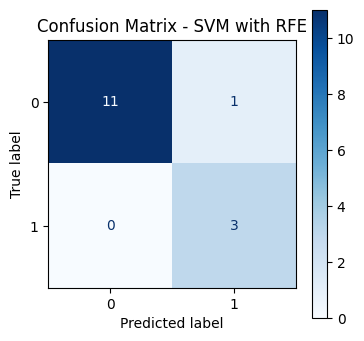


Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-validation Accuracy: 1.0000


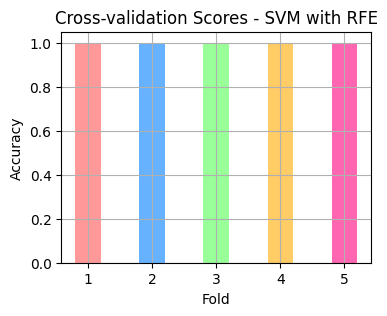

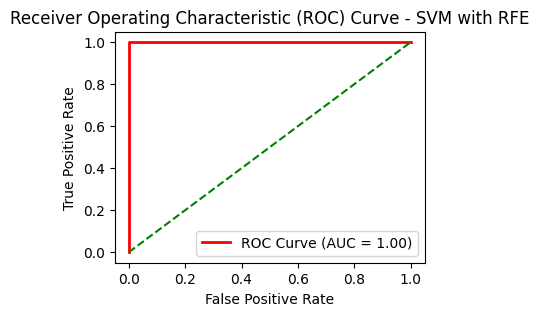

[0. 0. 0. 1.] [0.         0.33333333 1.         1.        ]


In [8]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Build the SVM model
svm = SVC(kernel='linear', random_state=12, probability=True)

# Initialize RFE with SVM as the estimator and select top K features
k = 250  # Number of top features to select
rfe_svm = RFE(estimator=svm, n_features_to_select=k, step=1)

# Fit RFE
rfe_svm.fit(X_train, Y_train)

# Transform the data using the selected features
X_train_rfe = rfe_svm.transform(X_train)
X_test_rfe = rfe_svm.transform(X_test)

# Train SVM using selected features
svm.fit(X_train_rfe, Y_train)

# Make predictions and evaluate performance
Y_pred = svm.predict(X_test_rfe)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, svm.predict_proba(X_test_rfe)[:, 1])

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
fig, ax = plt.subplots(figsize=(4, 4))  # Confusion matrix plot size
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix - SVM with RFE')
plt.show()

# Perform n-fold cross-validation
n = 5  # Number of folds
cv_scores = cross_val_score(svm, X_train_rfe, Y_train, cv=n)
print(f"\nCross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")

# Plot Cross-validation Scores as a bar plot
plt.figure(figsize=(4, 3))  # Cross-validation plot size
bar_width = 0.4  # Thinner bar width for a cleaner look
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC66', '#FF66B2']  # Custom color palette
plt.bar(range(1, n + 1), cv_scores, color=colors[:n], width=bar_width)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores - SVM with RFE')
plt.ylim(0, 1.05)  # Limit y-axis to ensure all bars are visible
plt.grid(True)
plt.show()

# Plot ROC Curve
plt.figure(figsize=(4, 3))  # ROC-AUC plot size
fpr, tpr, thresholds = metrics.roc_curve(Y_test, svm.predict_proba(X_test_rfe)[:, 1])
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM with RFE')
plt.legend(loc="lower right")
plt.show()
print(fpr, tpr)


Wrapper Feature Selection for Random Forest using RFE:

Accuracy: 0.8667

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.50      0.67         4

    accuracy                           0.87        15
   macro avg       0.92      0.75      0.79        15
weighted avg       0.89      0.87      0.85        15

Confusion Matrix:
[[11  0]
 [ 2  2]]

ROC-AUC Score: 0.9318


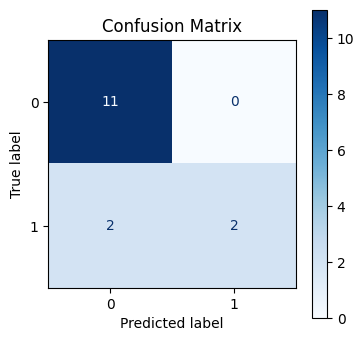


Cross-validation Scores: [0.75       0.5        0.72727273 0.90909091 0.72727273]
Mean Cross-validation Accuracy: 0.7227


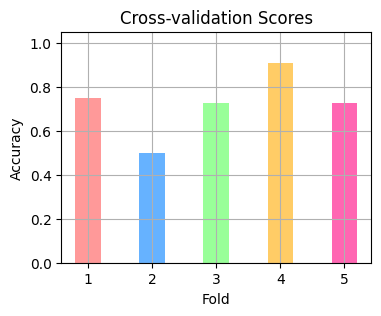

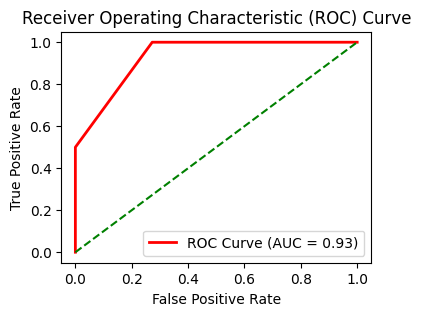

[0.         0.         0.27272727 1.        ] [0.  0.5 1.  1. ]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Build the Random Forest model
rf = RandomForestClassifier(n_estimators=3, random_state=13)

# Initialize RFE with Random Forest as the estimator and select top K features
k = 250  # Number of top features to select
rfe_rf = RFE(estimator=rf, n_features_to_select=k, step=1)

# Fit RFE
rfe_rf.fit(X_train, Y_train)

# Transform the data using the selected features
X_train_rfe = rfe_rf.transform(X_train)
X_test_rfe = rfe_rf.transform(X_test)

# Train Random Forest using selected features
rf.fit(X_train_rfe, Y_train)

# Make predictions and evaluate performance
Y_pred = rf.predict(X_test_rfe)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, rf.predict_proba(X_test_rfe)[:, 1])

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
fig, ax = plt.subplots(figsize=(4, 4))  # Confusion matrix plot size
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.show()

# Perform n-fold cross-validation
n = 5  # Number of folds
cv_scores = cross_val_score(rf, X_train_rfe, Y_train, cv=n)
print(f"\nCross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")

# Plot Cross-validation Scores as a bar plot
plt.figure(figsize=(4, 3))  # Cross-validation plot size
bar_width = 0.4  # Thinner bar width for a cleaner look
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC66', '#FF66B2']  # Custom color palette
plt.bar(range(1, n + 1), cv_scores, color=colors[:n], width=bar_width)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores')
plt.ylim(0, 1.05)  # Limit y-axis to ensure all bars are visible
plt.grid(True)
plt.show()

# Plot ROC Curve
plt.figure(figsize=(4, 3))  # ROC-AUC plot size
fpr, tpr, thresholds = metrics.roc_curve(Y_test, rf.predict_proba(X_test_rfe)[:, 1])
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(fpr,tpr)


Wrapper Feature Selection for SVM and RF using Genetic Algorithm (GA):

Running GA for SVM...
gen	nevals
0  	50    
1  	30    
2  	27    
3  	27    
4  	29    
5  	36    
6  	22    
7  	30    
8  	34    
9  	38    
10 	18    
Best Individual for SVM: [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0

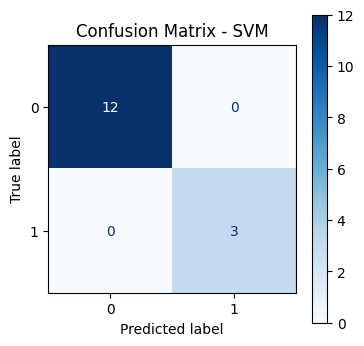


Cross-validation Scores: [1.         1.         0.90909091 1.         1.        ]
Mean Cross-validation Accuracy: 0.9818


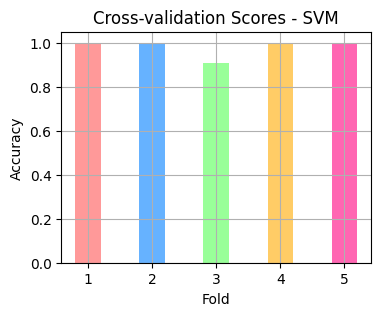

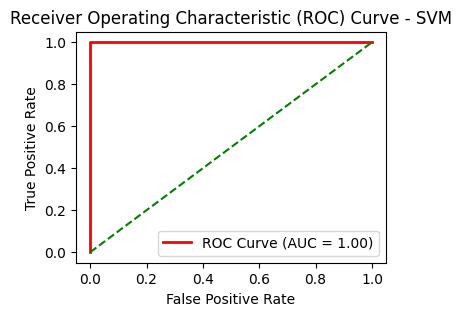

[0. 0. 0. 1.] [0.         0.33333333 1.         1.        ]

Running GA for Random Forest...
gen	nevals
0  	50    
1  	25    
2  	28    
3  	34    
4  	28    
5  	36    
6  	34    
7  	28    
8  	36    
9  	32    
10 	26    
Best Individual for RF: [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 

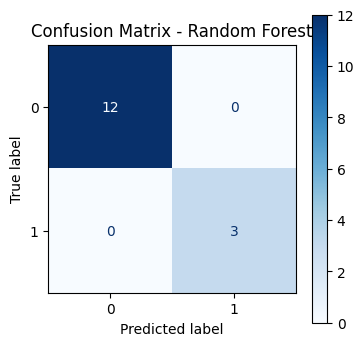


Cross-validation Scores: [1.         1.         0.90909091 1.         0.90909091]
Mean Cross-validation Accuracy: 0.9636


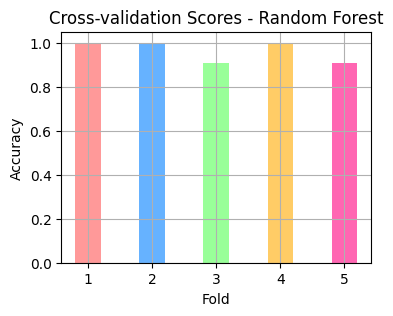

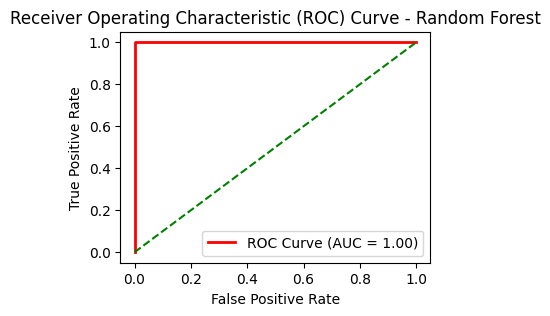

[0.         0.         0.         0.16666667 0.41666667 0.75
 0.91666667 1.        ] [0.         0.33333333 1.         1.         1.         1.
 1.         1.        ]


In [10]:
from deap import base, creator, tools, algorithms
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn import metrics

# Define evaluation function
def evaluate(individual, X_train, Y_train, X_test, Y_test, model):
    selected_features = [i for i, val in enumerate(individual) if val]
    if len(selected_features) == 0:
        return (0,)  # Return zero if no features are selected
    
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    
    model.fit(X_train_selected, Y_train)
    Y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    return (accuracy,)

# Function to print performance metrics and generate plots
def print_metrics(X_train, Y_train, X_test, Y_test, best_individual, model, model_name):
    selected_features = [i for i, val in enumerate(best_individual) if val]
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    
    model.fit(X_train_selected, Y_train)
    Y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred)
    confusion_mat = confusion_matrix(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test_selected)[:, 1])
    
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(confusion_mat)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")
    
    # Plot the confusion matrix
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
    fig, ax = plt.subplots(figsize=(4, 4))  # Confusion matrix plot size
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Perform n-fold cross-validation
    n = 5  # Number of folds
    cv_scores = cross_val_score(model, X_train_selected, Y_train, cv=n)
    print(f"\nCross-validation Scores: {cv_scores}")
    print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")

    # Plot Cross-validation Scores as a bar plot
    plt.figure(figsize=(4, 3))  # Cross-validation plot size
    bar_width = 0.4  # Thinner bar width for a cleaner look
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC66', '#FF66B2']  # Custom color palette
    plt.bar(range(1, n + 1), cv_scores, color=colors[:n], width=bar_width)
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'Cross-validation Scores - {model_name}')
    plt.ylim(0, 1.05)  # Limit y-axis to ensure all bars are visible
    plt.grid(True)
    plt.show()
    
    # Plot ROC Curve
    plt.figure(figsize=(4, 3))  # ROC-AUC plot size
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test_selected)[:, 1])
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    print(fpr, tpr)

# Setup Genetic Algorithm for SVM
def run_ga_svm(X_train, Y_train, X_test, Y_test):
    # Check and delete previous definitions if they exist
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train.shape[1])
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, model=SVC(kernel='linear', random_state=12, probability=True))
    toolbox.register("mate", tools.cxUniform, indpb=0.5)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)
    
    best_individual = tools.selBest(population, 1)[0]
    return best_individual

# Setup Genetic Algorithm for Random Forest
def run_ga_rf(X_train, Y_train, X_test, Y_test):
    # Check and delete previous definitions if they exist
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train.shape[1])
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, model=RandomForestClassifier(n_estimators=100, random_state=13, n_jobs=-1))
    toolbox.register("mate", tools.cxUniform, indpb=0.5)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)
    
    best_individual = tools.selBest(population, 1)[0]
    return best_individual

# Load dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# Apply label encoding to ensure binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Convert 'ALL' and 'AML' to 0 and 1

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=14)

# Run GA for SVM
print("Running GA for SVM...")
best_individual_svm = run_ga_svm(X_train, Y_train, X_test, Y_test)
print("Best Individual for SVM:", best_individual_svm)

# Print metrics and generate plots for SVM
print("\nPerformance Metrics for SVM:")
print_metrics(X_train, Y_train, X_test, Y_test, best_individual_svm, SVC(kernel='linear', random_state=12, probability=True), "SVM")

# Run GA for Random Forest
print("\nRunning GA for Random Forest...")
best_individual_rf = run_ga_rf(X_train, Y_train, X_test, Y_test)
print("Best Individual for RF:", best_individual_rf)

# Print metrics and generate plots for Random Forest
print("\nPerformance Metrics for Random Forest:")
print_metrics(X_train, Y_train, X_test, Y_test, best_individual_rf, RandomForestClassifier(n_estimators=100, random_state=13, n_jobs=-1), "Random Forest")


Hybrid Feature Selection Technique using (Mutual Information + RFE )

Random Forest Accuracy: 0.8000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.67      0.50      0.57         4

    accuracy                           0.80        15
   macro avg       0.75      0.70      0.72        15
weighted avg       0.79      0.80      0.79        15

Random Forest Confusion Matrix:
[[10  1]
 [ 2  2]]

Random Forest ROC-AUC Score: 0.8068


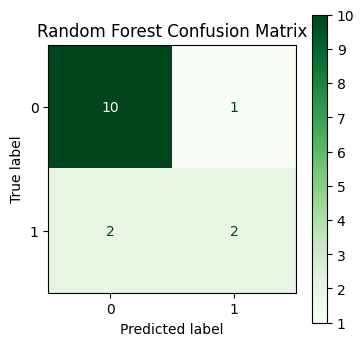


Random Forest Cross-validation Scores: [1.         0.83333333 0.81818182 0.81818182 0.90909091]
Random Forest Mean Cross-validation Accuracy: 0.8758


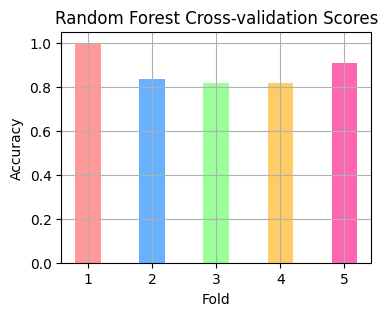

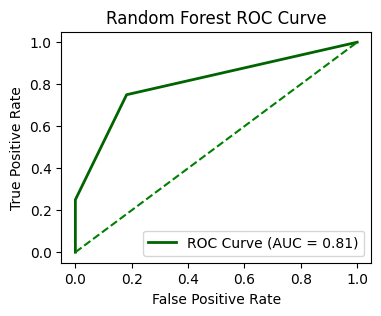


SVM Accuracy: 0.9333

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.90      0.95      0.92        15
weighted avg       0.95      0.93      0.94        15

SVM Confusion Matrix:
[[10  1]
 [ 0  4]]

SVM ROC-AUC Score: 0.9773


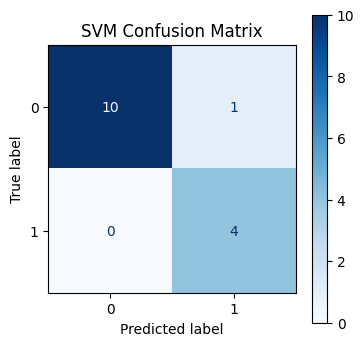


SVM Cross-validation Scores: [0.91666667 1.         0.72727273 0.90909091 1.        ]
SVM Mean Cross-validation Accuracy: 0.9106


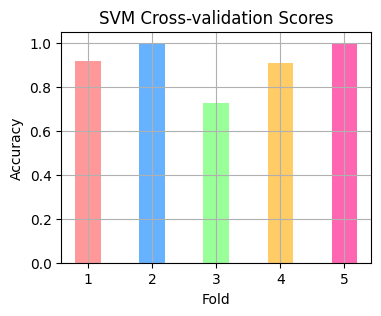

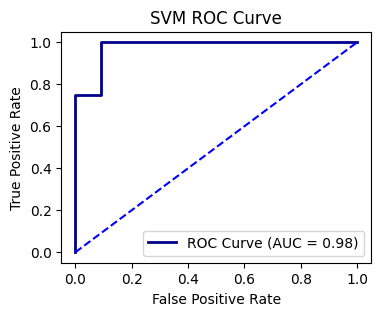

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Set the seed for reproducibility across NumPy random operations
np.random.seed(1111)

# Load dataset
df = pd.read_csv('binary.arff.csv')

# Set target column name as 'CLASS'
target_column = 'CLASS'

# Split features and target
X = data.drop(columns=[target_column])  
y = data[target_column]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train and test sets (80:20) with random state 13
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=13)

# Feature selection using Mutual Information (K=250)
mutual_info_selector = SelectKBest(mutual_info_classif, k=250)
X_train_mi = mutual_info_selector.fit_transform(X_train, y_train)
X_test_mi = mutual_info_selector.transform(X_test)

# Use Recursive Feature Elimination (RFE) with Random Forest for wrapper feature selection, selecting 50 features
rf = RandomForestClassifier(n_estimators=3, random_state=13)
rfe_selector = RFE(estimator=rf, n_features_to_select=50, step=10)
X_train_rfe = rfe_selector.fit_transform(X_train_mi, y_train)
X_test_rfe = rfe_selector.transform(X_test_mi)

# Train Random Forest using selected features
rf.fit(X_train_rfe, y_train)

# Make predictions and evaluate performance for Random Forest
y_pred_rf = rf.predict(X_test_rfe)

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_rfe)[:, 1])

# Output Random Forest results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:\n", classification_rep_rf)
print("Random Forest Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)
print(f"\nRandom Forest ROC-AUC Score: {roc_auc_rf:.4f}")

# Plot confusion matrix for Random Forest
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
fig, ax = plt.subplots(figsize=(4, 4))  # Confusion matrix plot size
disp.plot(cmap='Greens', ax=ax)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Perform 5-fold cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X_train_rfe, y_train, cv=5)
print(f"\nRandom Forest Cross-validation Scores: {cv_scores_rf}")
print(f"Random Forest Mean Cross-validation Accuracy: {cv_scores_rf.mean():.4f}")

# Plot Cross-validation Scores as a bar plot for Random Forest
plt.figure(figsize=(4, 3))  # Cross-validation plot size
bar_width = 0.4  # Thinner bar width for a cleaner look
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC66', '#FF66B2']  # Custom color palette
plt.bar(range(1, 6), cv_scores_rf, color=colors[:5], width=bar_width)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Random Forest Cross-validation Scores')
plt.ylim(0, 1.05)  # Limit y-axis to ensure all bars are visible
plt.grid(True)
plt.show()

# Plot ROC Curve for Random Forest
plt.figure(figsize=(4, 3))  # ROC-AUC plot size
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test_rfe)[:, 1])
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Now, perform the same steps for SVM
# Fit SVM model on the selected features
svc = SVC(kernel='linear', random_state=13, probability=True)
svc.fit(X_train_rfe, y_train)

# Predictions for SVM model
y_pred_svm = svc.predict(X_test_rfe)

# Calculate metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svc.predict_proba(X_test_rfe)[:, 1])

# Output SVM results
print(f"\nSVM Accuracy: {accuracy_svm:.4f}")
print("\nSVM Classification Report:\n", classification_rep_svm)
print("SVM Confusion Matrix:")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)
print(f"\nSVM ROC-AUC Score: {roc_auc_svm:.4f}")

# Plot confusion matrix for SVM
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
fig, ax = plt.subplots(figsize=(4, 4))  # Confusion matrix plot size
disp.plot(cmap='Blues', ax=ax)
plt.title('SVM Confusion Matrix')
plt.show()

# Perform 5-fold cross-validation for SVM
cv_scores_svm = cross_val_score(svc, X_train_rfe, y_train, cv=5)
print(f"\nSVM Cross-validation Scores: {cv_scores_svm}")
print(f"SVM Mean Cross-validation Accuracy: {cv_scores_svm.mean():.4f}")

# Plot Cross-validation Scores as a bar plot for SVM
plt.figure(figsize=(4, 3))  # Cross-validation plot size
bar_width = 0.4  # Thinner bar width for a cleaner look
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC66', '#FF66B2']  # Custom color palette
plt.bar(range(1, 6), cv_scores_svm, color=colors[:5], width=bar_width)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('SVM Cross-validation Scores')
plt.ylim(0, 1.05)  # Limit y-axis to ensure all bars are visible
plt.grid(True)
plt.show()

# Plot ROC Curve for SVM
plt.figure(figsize=(4, 3))  # ROC-AUC plot size
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svc.predict_proba(X_test_rfe)[:, 1])
plt.plot(fpr_svm, tpr_svm, color='darkblue', lw=2, label=f'ROC Curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()



Plotting in Graph

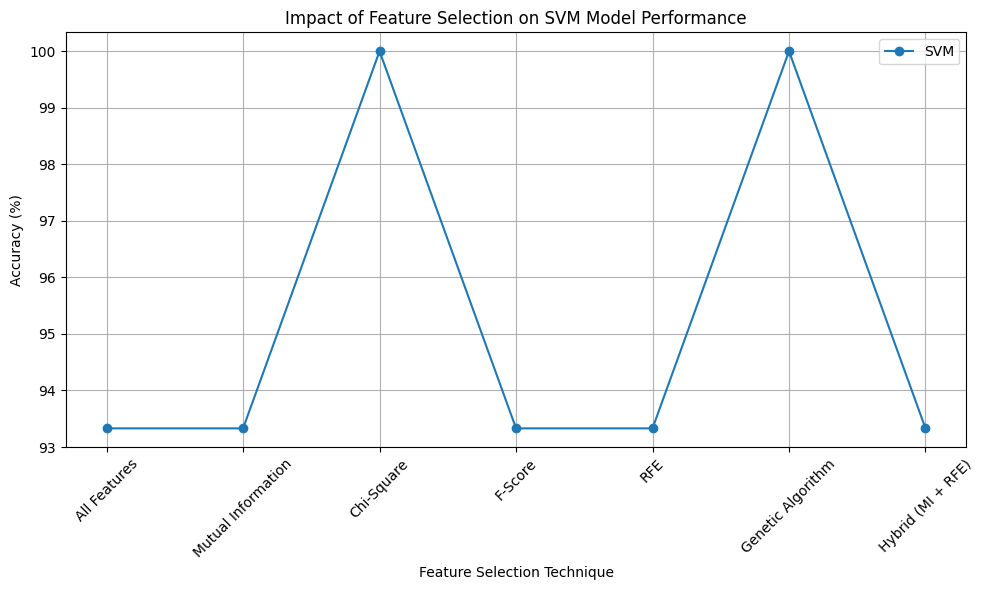

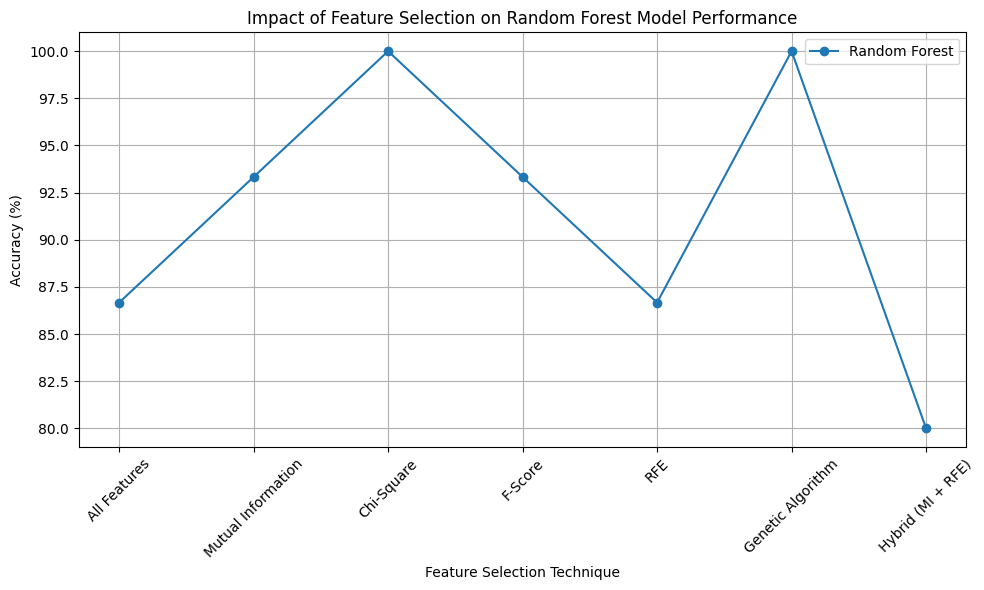

In [19]:
import matplotlib.pyplot as plt

# Example data preparation: Replace with your actual dataset and feature selection results
techniques = ["All Features", "Mutual Information", "Chi-Square", "F-Score", "RFE", "Genetic Algorithm", "Hybrid (MI + RFE)"]

# Replace these with your actual accuracies (in percentage)
# Single accuracy before feature selection
accuracy_before_selection_svm = 93.33  # Example percentage value for SVM before feature selection
accuracy_before_selection_rf = 86.67   # Example percentage value for RF before feature selection

# Accuracies after feature selection (in percentage)
accuracy_after_selection_svm = [93.33, 100, 93.33, 93.33, 100, 93.33]  # Example percentage values after feature selection for SVM
accuracy_after_selection_rf = [93.33, 100, 93.33, 86.67 , 100, 80.00]   # Example percentage values after feature selection for RF

# Insert the "All Features" accuracy at the beginning of the list for each model
accuracies_svm = [accuracy_before_selection_svm] + accuracy_after_selection_svm
accuracies_rf = [accuracy_before_selection_rf] + accuracy_after_selection_rf

# Plotting the accuracies for SVM and Random Forest models
def plot_accuracies(model_name, techniques, accuracies):
    plt.figure(figsize=(10, 6))
    
    # Plotting the accuracies
    plt.plot(techniques, accuracies, label=f'{model_name}', marker='o', linestyle='-')
    
    # Adding labels and title
    plt.title(f'Impact of Feature Selection on {model_name} Model Performance')
    plt.xlabel('Feature Selection Technique')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Plot for SVM
plot_accuracies('SVM', techniques, accuracies_svm)

# Plot for Random Forest
plot_accuracies('Random Forest', techniques, accuracies_rf)
